In [114]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import os
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.neural_network import MLPRegressor
import datetime
from pandas.tseries.offsets import *


In [4]:
data_folder = '/Users/jeffreychen/UCLA_HWDATA/QAM_DATA/final_data/'
stk_char_all_data_raw = pd.read_csv(data_folder + 'datashare.csv')

In [5]:
stk_char_all_cols = (stk_char_all_data_raw.columns[3:])

In [6]:
stk_char_all_data = stk_char_all_data_raw.copy()

In [ ]:
stk_char_all_data['DATE'] = pd.to_datetime(stk_char_all_data['DATE'], format='%Y%m%d', errors='ignore')
stk_char_all_data['Year'] = stk_char_all_data['DATE'].dt.year
stk_char_all_data['Month'] = stk_char_all_data['DATE'].dt.month
stk_char_all_data

Top 100 

In [70]:
data_folder = '/Users/jeffreychen/UCLA_HWDATA/QAM_DATA/final_data/'
stk_char_top100 = pd.read_csv(data_folder + 'top100.csv')

In [71]:
stk_char_top100.drop('Unnamed: 0', axis=1, inplace=True)
stk_char_cols = stk_char_top100.columns[3:97]
stk_char_top100['DATE'] = pd.to_datetime(stk_char_top100['DATE'], format='%Y%m%d', errors='ignore')
stk_char_top100['Year'] =stk_char_top100['DATE'].dt.year
stk_char_top100['Month'] = stk_char_top100['DATE'].dt.month
stk_char_top100

,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,Year,Month
0,12490,1957-03-29,0.021632,2.670134e+06,0.883275,0.780175,-0.433502,11.117510,0.024761,0.059540,...,0.011232,1.803178e-08,0.015564,0.011362,0.726834,0.257736,4.528170e-07,73.0,1957,3
1,19721,1957-03-29,0.047619,1.669815e+05,0.355230,0.126189,0.035148,9.502637,0.022371,0.059540,...,0.015031,9.734579e-08,0.033058,0.011631,0.474653,0.258231,2.718541e-07,60.0,1957,3
2,12490,1957-04-30,0.101059,2.727894e+06,0.927092,0.859499,0.002440,11.818714,0.024424,-0.014150,...,0.007166,1.613211e-08,0.032448,0.009242,0.619957,0.074873,6.880241e-07,73.0,1957,4
3,19721,1957-04-30,0.030769,1.722825e+05,0.338032,0.114265,0.157661,9.557010,0.022476,-0.014150,...,0.013312,1.889849e-07,0.023622,0.010173,0.702409,0.410673,2.623218e-07,60.0,1957,4
4,12490,1957-05-31,0.059732,3.003572e+06,0.936784,0.877565,0.123505,11.321771,0.024023,0.001498,...,0.008123,1.731239e-08,0.032075,0.010526,0.599211,0.101190,6.010760e-07,73.0,1957,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15064,92257,2016-12-30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,0.016401,...,0.017066,7.234430e-11,0.032050,0.011528,0.484570,4.852816,7.062011e-09,73.0,2016,12
15065,92261,2016-12-30,0.017133,4.804115e+06,0.815127,0.664433,-0.269768,15.166535,0.026311,-0.003775,...,0.017716,4.063225e-10,0.035589,0.012559,0.339493,1.574070,2.309917e-08,73.0,2016,12
15066,93002,2016-12-30,0.042818,3.871761e+07,1.429032,2.042134,-0.079314,17.616621,0.038861,0.125907,...,0.023578,2.811488e-11,0.027821,0.017335,0.387613,2.401959,1.546873e-08,36.0,2016,12
15067,93132,2016-12-30,0.000664,5.208474e+06,1.299777,1.689419,-0.069890,16.991111,0.037352,0.053773,...,0.027387,1.876530e-10,0.018459,0.013527,0.574037,8.767311,7.272621e-09,35.0,2016,12


In [72]:
#(stk_char_cols) = stk_char_cols[1:]
(stk_char_cols)

Index(['mvel1', 'beta', 'betasq', 'chmom', 'dolvol', 'idiovol', 'indmom',
       'mom1m', 'mom6m', 'mom12m', 'mom36m', 'pricedelay', 'turn', 'absacc',
       'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt', 'cashpr', 'cfp',
       'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 'convind',
       'currat', 'depr', 'divi', 'divo', 'dy', 'egr', 'ep', 'gma', 'grcapx',
       'grltnoa', 'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof',
       'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale',
       'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga',
       'pchsaleinv', 'pctacc', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale',
       'realestate', 'roic', 'salecash', 'saleinv', 'salerec', 'secured',
       'securedind', 'sgr', 'sin', 'sp', 'tang', 'tb', 'aeavol', 'cash',
       'chtx', 'cinvest', 'ear', 'nincr', 'roaq', 'roavol', 'roeq', 'rsup',
       'stdacc', 'stdcf', 'ms', 'baspread', 'ill', 'maxret', 'retvol',
       'std_dolvol', 'std_

Clean Macro Data


In [59]:
macro_data=pd.read_csv(data_folder + 'macro/Macro_Result.csv')
macro_data.drop('Unnamed: 0', axis=1, inplace=True)
macro_data['date'] = pd.to_datetime(macro_data['yyyymm'].astype(str), format='%Y%m', errors='ignore') + MonthEnd(1)
macro_data['Year'] = macro_data['date'].dt.year
macro_data['Month'] = macro_data['date'].dt.month
macro_data.rename(columns={
    'dp':'DP',
    'ep':'EP',
    'tms':'TMS',
    'dfy':'DFY',
    'b/m':'B/M',
    'ntis':'NTIS',
    'tbl':'TBL',
    'svar':'SVAR',
    
}, inplace=True)


In [60]:
macro_params = [ 'DP', 'EP', 'TMS', 'DFY', 'B/M', 'NTIS', 'TBL', 'SVAR']
macro_data[macro_params] = macro_data[macro_params].shift(-1)
macro_data

,yyyymm,DP,EP,TMS,DFY,B/M,NTIS,TBL,SVAR,date,Year,Month
0,187101,-2.851151,-2.420368,NaN,NaN,NaN,NaN,NaN,NaN,1871-01-31,1871,1
1,187102,-2.875302,-2.444519,NaN,NaN,NaN,NaN,NaN,NaN,1871-02-28,1871,2
2,187103,-2.903111,-2.472328,NaN,NaN,NaN,NaN,NaN,NaN,1871-03-31,1871,3
3,187104,-2.928112,-2.497329,NaN,NaN,NaN,NaN,NaN,NaN,1871-04-30,1871,4
4,187105,-2.919848,-2.489065,NaN,NaN,NaN,NaN,NaN,NaN,1871-05-31,1871,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,202008,-4.045576,-3.533379,0.0057,0.0105,0.241482,-0.005698,0.0011,0.004907,2020-08-31,2020,8
1796,202009,-4.020767,-3.519301,0.0069,0.0109,0.253146,-0.001895,0.0010,0.003661,2020-09-30,2020,9
1797,202010,-4.126172,-3.635623,0.0078,0.0100,0.226352,-0.005262,0.0009,0.002492,2020-10-31,2020,10
1798,202011,-4.165889,-3.686452,0.0084,0.0090,0.219195,-0.000094,0.0009,0.000678,2020-11-30,2020,11


Clean Stock Characteristic Data

In [146]:
# stk_cahr_data=pd.read_csv(data_folder+'stock_char_data/neural_net20.csv')
# stk_cahr_data.drop('Unnamed: 0', axis=1, inplace=True)
# stk_char_all_data.head()

In [139]:
# stk_cahr_data['DATE'] = pd.to_datetime(stk_cahr_data['DATE'], format='%Y-%m-%d', errors='ignore')
# stk_cahr_data['Year'] = stk_cahr_data['DATE'].dt.year
# stk_cahr_data['Month'] = stk_cahr_data['DATE'].dt.month
# stk_cahr_data

Krnecker

In [73]:
all_data = stk_char_top100.merge(macro_data, on=['Year','Month'], how='left').copy()

In [74]:
all_data

,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,yyyymm,DP,EP,TMS,DFY,B/M,NTIS,TBL,SVAR,date
0,12490,1957-03-29,0.021632,2.670134e+06,0.883275,0.780175,-0.433502,11.117510,0.024761,0.059540,...,195703,-3.274852,-2.597238,0.0038,0.0077,0.576098,0.027421,0.0307,0.000302,1957-03-31
1,19721,1957-03-29,0.047619,1.669815e+05,0.355230,0.126189,0.035148,9.502637,0.022371,0.059540,...,195703,-3.274852,-2.597238,0.0038,0.0077,0.576098,0.027421,0.0307,0.000302,1957-03-31
2,12490,1957-04-30,0.101059,2.727894e+06,0.927092,0.859499,0.002440,11.818714,0.024424,-0.014150,...,195704,-3.311134,-2.631567,0.0042,0.0078,0.564039,0.028849,0.0306,0.000482,1957-04-30
3,19721,1957-04-30,0.030769,1.722825e+05,0.338032,0.114265,0.157661,9.557010,0.022476,-0.014150,...,195704,-3.311134,-2.631567,0.0042,0.0078,0.564039,0.028849,0.0306,0.000482,1957-04-30
4,12490,1957-05-31,0.059732,3.003572e+06,0.936784,0.877565,0.123505,11.321771,0.024023,0.001498,...,195705,-3.309868,-2.628349,0.0032,0.0072,0.565877,0.030528,0.0329,0.000579,1957-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15064,92257,2016-12-30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,0.016401,...,201612,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,2016-12-31
15065,92261,2016-12-30,0.017133,4.804115e+06,0.815127,0.664433,-0.269768,15.166535,0.026311,-0.003775,...,201612,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,2016-12-31
15066,93002,2016-12-30,0.042818,3.871761e+07,1.429032,2.042134,-0.079314,17.616621,0.038861,0.125907,...,201612,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,2016-12-31
15067,93132,2016-12-30,0.000664,5.208474e+06,1.299777,1.689419,-0.069890,16.991111,0.037352,0.053773,...,201612,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,2016-12-31


In [75]:
all_data['Const'] = 1
all_data.drop(['yyyymm','Year','Month','date'], axis=1, inplace=True)

In [76]:
all_data

,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,sic2,DP,EP,TMS,DFY,B/M,NTIS,TBL,SVAR,Const
0,12490,1957-03-29,0.021632,2.670134e+06,0.883275,0.780175,-0.433502,11.117510,0.024761,0.059540,...,73.0,-3.274852,-2.597238,0.0038,0.0077,0.576098,0.027421,0.0307,0.000302,1
1,19721,1957-03-29,0.047619,1.669815e+05,0.355230,0.126189,0.035148,9.502637,0.022371,0.059540,...,60.0,-3.274852,-2.597238,0.0038,0.0077,0.576098,0.027421,0.0307,0.000302,1
2,12490,1957-04-30,0.101059,2.727894e+06,0.927092,0.859499,0.002440,11.818714,0.024424,-0.014150,...,73.0,-3.311134,-2.631567,0.0042,0.0078,0.564039,0.028849,0.0306,0.000482,1
3,19721,1957-04-30,0.030769,1.722825e+05,0.338032,0.114265,0.157661,9.557010,0.022476,-0.014150,...,60.0,-3.311134,-2.631567,0.0042,0.0078,0.564039,0.028849,0.0306,0.000482,1
4,12490,1957-05-31,0.059732,3.003572e+06,0.936784,0.877565,0.123505,11.321771,0.024023,0.001498,...,73.0,-3.309868,-2.628349,0.0032,0.0072,0.565877,0.030528,0.0329,0.000579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15064,92257,2016-12-30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,0.016401,...,73.0,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,1
15065,92261,2016-12-30,0.017133,4.804115e+06,0.815127,0.664433,-0.269768,15.166535,0.026311,-0.003775,...,73.0,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,1
15066,93002,2016-12-30,0.042818,3.871761e+07,1.429032,2.042134,-0.079314,17.616621,0.038861,0.125907,...,36.0,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,1
15067,93132,2016-12-30,0.000664,5.208474e+06,1.299777,1.689419,-0.069890,16.991111,0.037352,0.053773,...,35.0,-3.904363,-3.162272,0.0227,0.0074,0.291980,-0.022582,0.0051,0.000336,1


In [77]:
macro_params.append('Const')
macro_params

['DP', 'EP', 'TMS', 'DFY', 'B/M', 'NTIS', 'TBL', 'SVAR', 'Const']

In [78]:
# cit_cols = ['mom1m', 'maxret', 'chmom', 'mom6m',
#        'mom12m', 'indmom', 'mom36m', 'mvel1', 'dolvol', 'turn', 'baspread',
#        'ill', 'std_turn', 'zerotrade', 'retvol', 'idiovol', 'beta', 'nincr',
#        'sp', 'securedind']
cit_cols = stk_char_cols
xt_cols = macro_params
Pc = len(cit_cols)
Px = len(xt_cols)
# Xt = all_data[xt_cols].copy()
# Cit = all_data[ct_cols].copy()
print(f'total covariates should be: Pxt * Pcit = {Pc} * {Px} = {Pc * Px}')

total covariates should be: Pxt * Pcit = 94 * 9 = 846


In [47]:
# qam_data_folder = '/Users/jeffreychen/UCLA_HWDATA/QAM_DATA/'
# crsp_raw = pd.read_pickle(qam_data_folder + 'crsp_raw.pkl')
# dlret_raw = pd.read_pickle(qam_data_folder + 'dlret_raw.pkl')
# # Dlist Ret 
# dlret_raw[['permno', 'permco']] = dlret_raw[['permno', 'permco']] .astype(int)
# dlret_raw['dlstdt'] = pd.to_datetime(dlret_raw['dlstdt'])

# dlret_raw.drop(['permco'], axis=1, inplace=True)
# # CRSP 
# crsp_raw[['permno', 'permco']] = crsp_raw[['permno', 'permco']] .astype(int)
# crsp_raw['date'] = pd.to_datetime(crsp_raw['date'], format='%Y-%m-%d', errors='ignore')

# #create jdate for later use (june date holder)
# dlret_raw['jdate'] = dlret_raw['dlstdt'] + MonthEnd(0)
# crsp_raw['jdate'] = pd.DataFrame(crsp_raw[['date']].values.astype('datetime64[ns]')) + MonthEnd(0)

# crsp_raw.drop(['siccd','naics'], axis=1, inplace=True)

# crsp = pd.merge(crsp_raw, dlret_raw, how='left', on=['permno', 'jdate'])
# aux = crsp[(crsp['ret'].isna() & crsp['dlret'].isna())].index
# crsp['dlret'] = crsp['dlret'].fillna(0)
# crsp['ret'] = crsp['ret'].fillna(0)
# crsp['ret'] = (1+crsp['ret'])*(1+crsp['dlret']) - 1
# crsp.loc[aux, ['ret']] = np.nan
# del aux
# crsp_ret = crsp[['permno','date','ret']].copy()
# del crsp
# crsp_ret

In [41]:
# all_data[:10][xt_cols]

In [79]:
def kro(row):
    Cit = row[cit_cols]
    Xt = row[xt_cols]
    zit = np.kron(Xt, Cit)
    return zit
Zit = pd.DataFrame(all_data.apply(kro, axis=1).to_list())


In [80]:
Zit

,0,1,2,3,4,5,6,7,8,9,...,836,837,838,839,840,841,842,843,844,845
0,-8.744291e+06,-2.892596,-2.554958,1.419655,-36.408196,-0.081088,-0.194986,0.053738,-0.233609,-1.943130,...,NaN,NaN,NaN,0.011232,1.803178e-08,0.015564,0.011362,0.726834,0.257736,4.528170e-07
1,-5.468397e+05,-1.163327,-0.413249,-0.115105,-31.119727,-0.073261,-0.194986,-0.163743,-0.141881,-0.348055,...,NaN,NaN,NaN,0.015031,9.734579e-08,0.033058,0.011631,0.474653,0.258231,2.718541e-07
2,-9.032423e+06,-3.069724,-2.845915,-0.008078,-39.133340,-0.080870,0.046851,-0.071627,-0.420609,-0.976525,...,NaN,NaN,NaN,0.007166,1.613211e-08,0.032448,0.009242,0.619957,0.074873,6.880241e-07
3,-5.704504e+05,-1.119268,-0.378348,-0.522035,-31.644538,-0.074423,0.046851,-0.157673,-0.346922,-0.345906,...,NaN,NaN,NaN,0.013312,1.889849e-07,0.023622,0.010173,0.702409,0.410673,2.623218e-07
4,-9.941426e+06,-3.100632,-2.904624,-0.408785,-37.473564,-0.079511,-0.004958,-0.334491,-0.386895,-0.779706,...,NaN,NaN,NaN,0.008123,1.731239e-08,0.032075,0.010526,0.599211,0.101190,6.010760e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15064,-3.534411e+07,-2.674616,-1.832200,-1.380854,-67.796856,-0.144251,-0.064034,-0.126172,-1.163056,-1.092916,...,0.115166,0.103160,5.0,0.017066,7.234430e-11,0.032050,0.011528,0.484570,4.852816,7.062011e-09
15065,-1.875701e+07,-3.182553,-2.594186,1.053273,-59.215653,-0.102727,0.014739,-0.159639,0.720209,0.342407,...,0.102500,0.113006,6.0,0.017716,4.063225e-10,0.035589,0.012559,0.339493,1.574070,2.309917e-08
15066,-1.511676e+08,-5.579461,-7.973230,0.309673,-68.781678,-0.151727,-0.491588,-0.004815,-0.429310,-1.255480,...,0.172653,0.277172,6.0,0.023578,2.811488e-11,0.027821,0.017335,0.387613,2.401959,1.546873e-08
15067,-2.033577e+07,-5.074799,-6.596106,0.272877,-66.339461,-0.145836,-0.209947,0.238695,0.245378,0.429241,...,0.092266,0.086121,6.0,0.027387,1.876530e-10,0.018459,0.013527,0.574037,8.767311,7.272621e-09


In [20]:
# Cit = all_data[cit_cols].copy()
# Xt = all_data[xt_cols].copy()
# Zit = pd.DataFrame(np.kron(Xt, Cit), columns=pd.MultiIndex.from_product([Xt, Cit]))
# Zit

In [81]:
Zit.insert (0, "permno", all_data['permno'])
Zit.insert (1, "DATE", all_data['DATE'])
Zit.insert (2, "monthly_ret", all_data['monthly_ret'])
Zit

,permno,DATE,monthly_ret,0,1,2,3,4,5,6,...,836,837,838,839,840,841,842,843,844,845
0,12490,1957-03-29,0.021632,-8.744291e+06,-2.892596,-2.554958,1.419655,-36.408196,-0.081088,-0.194986,...,NaN,NaN,NaN,0.011232,1.803178e-08,0.015564,0.011362,0.726834,0.257736,4.528170e-07
1,19721,1957-03-29,0.047619,-5.468397e+05,-1.163327,-0.413249,-0.115105,-31.119727,-0.073261,-0.194986,...,NaN,NaN,NaN,0.015031,9.734579e-08,0.033058,0.011631,0.474653,0.258231,2.718541e-07
2,12490,1957-04-30,0.101059,-9.032423e+06,-3.069724,-2.845915,-0.008078,-39.133340,-0.080870,0.046851,...,NaN,NaN,NaN,0.007166,1.613211e-08,0.032448,0.009242,0.619957,0.074873,6.880241e-07
3,19721,1957-04-30,0.030769,-5.704504e+05,-1.119268,-0.378348,-0.522035,-31.644538,-0.074423,0.046851,...,NaN,NaN,NaN,0.013312,1.889849e-07,0.023622,0.010173,0.702409,0.410673,2.623218e-07
4,12490,1957-05-31,0.059732,-9.941426e+06,-3.100632,-2.904624,-0.408785,-37.473564,-0.079511,-0.004958,...,NaN,NaN,NaN,0.008123,1.731239e-08,0.032075,0.010526,0.599211,0.101190,6.010760e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15064,92257,2016-12-30,-0.029702,-3.534411e+07,-2.674616,-1.832200,-1.380854,-67.796856,-0.144251,-0.064034,...,0.115166,0.103160,5.0,0.017066,7.234430e-11,0.032050,0.011528,0.484570,4.852816,7.062011e-09
15065,92261,2016-12-30,0.017133,-1.875701e+07,-3.182553,-2.594186,1.053273,-59.215653,-0.102727,0.014739,...,0.102500,0.113006,6.0,0.017716,4.063225e-10,0.035589,0.012559,0.339493,1.574070,2.309917e-08
15066,93002,2016-12-30,0.042818,-1.511676e+08,-5.579461,-7.973230,0.309673,-68.781678,-0.151727,-0.491588,...,0.172653,0.277172,6.0,0.023578,2.811488e-11,0.027821,0.017335,0.387613,2.401959,1.546873e-08
15067,93132,2016-12-30,0.000664,-2.033577e+07,-5.074799,-6.596106,0.272877,-66.339461,-0.145836,-0.209947,...,0.092266,0.086121,6.0,0.027387,1.876530e-10,0.018459,0.013527,0.574037,8.767311,7.272621e-09


In [82]:
Z_cln = Zit.sort_values(by=['permno','DATE']).copy()
Z_cln

,permno,DATE,monthly_ret,0,1,2,3,4,5,6,...,836,837,838,839,840,841,842,843,844,845
2082,10104,1986-04-30,0.197605,-9.422119e+05,NaN,NaN,NaN,NaN,NaN,-1.262436,...,NaN,NaN,NaN,0.015968,1.160438e-08,0.037500,0.023447,0.986893,24.388424,1.818006e-08
2094,10104,1986-05-30,-0.060000,-1.131930e+06,NaN,NaN,NaN,NaN,NaN,-1.333255,...,NaN,NaN,NaN,0.036093,2.878011e-08,0.096154,0.044076,0.771263,3.065399,2.101072e-08
2106,10104,1986-06-30,0.037234,-1.043617e+06,NaN,NaN,NaN,-42.597696,NaN,-1.349376,...,NaN,NaN,NaN,0.030514,5.437225e-08,0.030612,0.026788,1.024313,2.054953,4.449384e-08
2118,10104,1986-07-31,-0.364103,-1.102878e+06,NaN,NaN,NaN,-40.773655,NaN,-1.635362,...,NaN,NaN,NaN,0.036569,2.715533e-08,0.063830,0.021570,0.927649,3.053582,2.880152e-08
2130,10104,1986-08-29,0.064516,-6.819801e+05,NaN,NaN,NaN,-41.222505,NaN,-1.453389,...,NaN,NaN,NaN,0.045777,4.807930e-08,0.070423,0.047878,1.127539,7.962969,1.875545e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14770,93436,2016-08-31,-0.097023,-1.352634e+08,-6.202310,-9.928800,-1.974379,-72.395007,-0.207256,0.393614,...,0.318933,0.991338,4.0,0.027501,1.507552e-11,0.036904,0.016816,0.274125,7.100033,4.363933e-09
14844,93436,2016-09-30,-0.037640,-1.218099e+08,-6.299909,-10.309192,-1.285866,-71.191640,-0.204460,-0.068724,...,0.318933,0.991338,4.0,0.020614,1.517188e-11,0.021347,0.010832,0.334028,6.298895,4.550212e-09
14918,93436,2016-10-31,-0.030878,-1.185609e+08,-6.336584,-10.352547,0.143602,-71.824949,-0.203454,-0.498108,...,0.318933,0.991338,4.0,0.026596,2.033979e-11,0.025533,0.019162,0.321573,9.232955,4.396939e-09
14993,93436,2016-11-30,-0.042128,-1.153390e+08,-6.282832,-10.143388,1.331747,-72.544069,-0.198336,-0.378819,...,0.263200,0.895781,4.0,0.026598,1.913896e-11,0.047395,0.019841,0.467575,16.339819,3.384563e-09


In [83]:
# Z_cln['daten'] = Z_cln['DATE'].dt.year*12 + Z_cln['DATE'].dt.month
# Z_cln['IsValidLag'] = Z_cln['daten'].diff(1) == 1
# Z_cln.loc[Z_cln[Z_cln['KYTREASNO'].diff(1) != 0].index, ['IsValidLag']] = False
# Z_cln['ret'] = Z_cln[['KYTREASNO','MV']].groupby('KYTREASNO').shift(1)
# Z_cln.loc[Z_cln[Z_cln['IsValidLag'] == False].index, ['Lme']] = np.nan
# Z_cln = Z_cln.drop(['IsValidLag', 'daten'], axis = 1)

Model Testing

In [84]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [85]:
kronercker_outcome = Z_cln.copy()
kronercker_outcome = kronercker_outcome.fillna(0)
kronercker_outcome['Year'] = kronercker_outcome['DATE'].dt.year
kronercker_outcome['Month'] = kronercker_outcome['DATE'].dt.month

In [86]:
train_df = kronercker_outcome[kronercker_outcome['Year']<2010].copy()
test_df = kronercker_outcome[kronercker_outcome['Year'] >= 2010].copy()

In [87]:
X_train = train_df.iloc[:,3:183]
y_train = train_df['monthly_ret']
X_test = test_df.iloc[:,3:183]
y_test = test_df['monthly_ret']



In [88]:
lm = LinearRegression()
y_pred = cross_val_predict(lm, X_train, y_train, cv=4)
y_pred

array([ 0.0184672 ,  0.02101802, -0.00852624, ...,  0.0299011 ,
        0.0217073 ,  0.02455347])

In [89]:
final_model = lm.fit(X_train,y_train)
new_predictions = final_model.predict(X_test)

In [90]:
MSE_OLS = mean_squared_error(new_predictions,y_test)
R2_OLS = r2_score(new_predictions,y_test)
print(
    f'MSE : {MSE_OLS}'
    f'R2 : {R2_OLS}'
)

MSE : 0.03032895757403428R2 : -0.7803229013457229


PLS

In [92]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

In [97]:
X = kronercker_outcome.iloc[:,3:183]
y = kronercker_outcome['monthly_ret']

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [95]:
# Choose components = 2
pls = PLSRegression(n_components=2)
y_pred = cross_val_predict(pls, X_train, y_train, cv=5)
final_model = pls.fit(X_train,y_train)
new_predictions = final_model.predict(X_test)

In [96]:
R2_PLS = r2_score(new_predictions,y_test)
R2_PLS

-0.1332524111437985

PCR

In [98]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'hp')

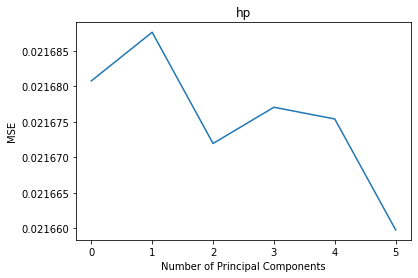

In [99]:
X = kronercker_outcome.iloc[:,3:183]
y = kronercker_outcome['monthly_ret']


pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [100]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:2]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:2], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)

In [101]:
MSE_PCR = mean_squared_error(pred,y_test)
MSE_PCR

0.014190047551032762

In [102]:
R2_PCR = r2_score(pred,y_test)
R2_PCR

-323.99312845381706

Elastic NEt

In [103]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [105]:
# lambdas = 2**np.linspace(-1,5,25)*0.02
# elastic_net = ElasticNet(l1_ratio = 0.5)
# coefs = pd.DataFrame(index = lambdas, columns = X_train.columns)
# for j, l in enumerate(lambdas):
#         elastic_net.alpha = l   # set the severity of the constraint
#         elastic_net.fit(X_train, y_train)
#         coefs.iloc[j] = elastic_net.coef_


In [109]:

# alpha = 10**np.linspace(-1,10,100)*0.02
# elastic_net = ElasticNetCV(l1_ratio=0.5,alphas=alpha,cv=5)
# elastic_net.fit(X_train, y_train)
# elastic_net.alpha_
# elastic_net.coef_

In [107]:
pred = elastic_net.predict(X_test)
MSE_EN = mean_squared_error(pred,y_test)
MSE_EN

0.01421325752441326

In [108]:
R2_EN = r2_score(pred,y_test)
R2_EN

-107.18065513345051

ＮＮ

In [88]:
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.neural_network import MLPRegressor

In [54]:
train_df = kronercker_outcome[kronercker_outcome['Year']<2010].copy()
test_df = kronercker_outcome[kronercker_outcome['Year'] >= 2010].copy()

X_train = train_df.iloc[:,3:183]
y_train = train_df['monthly_ret']
X_test = test_df.iloc[:,3:183]
y_test = test_df['monthly_ret']
# scale X variables to mean zero and unit variance
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:

# Define networks
NN1 = MLPRegressor(solver='lbfgs', alpha=1,activation='relu',
                    hidden_layer_sizes=(32,), max_iter = 10000, random_state=1)

# Train the model
NN1_regr = NN1.fit(X_train, y_train)

# R2 of neural net fit, in sample
R2_NN1_insample = NN1_regr.score(X_train_scaled, y_train, sample_weight=None)

# R2 of neural net fit, out of sample
R2_NN1_outsample = NN1_regr.score(X_test_scaled, y_test, sample_weight=None)

print(
    f'R2 insample : {R2_NN1_insample}\n'
    f'R2 outsample : {R2_NN1_outsample}'
    )

R2 insample : -99114.42104195194
R2 outsample : -599338.7029326633


In [111]:

## 2 layer
NN2 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='relu',
                      hidden_layer_sizes = (32,16), max_iter = 100000, random_state = 1)
NN2.fit(X_train_scaled,y_train)

# R2 of neural net fit, in sample
R2_NN2_insample = NN2.score(X_train_scaled, y_train, sample_weight=None)

# R2 of neural net fit, out of sample
R2_NN2_outsample = NN2.score(X_test_scaled, y_test, sample_weight=None)

print(
    f'R2 insample : {R2_NN2_insample}\n'
    f'R2 outsample : {R2_NN2_outsample}'
    )

R2 insample : 0.49296119384116965
R2 outsample : -36.38661935977485


In [118]:
from sklearn.neural_network import MLPClassifier

#try classifier
## 2 layer
NN2c = MLPClassifier(solver = 'lbfgs', activation='relu', alpha=1e-5,
                      hidden_layer_sizes = (32,16), max_iter = 100000, random_state = 1)
NN2c.fit(X_train_scaled, y_train)

# R2 of neural net fit, in sample
R2c_NN2_insample = NN2c.score(X_train_scaled, y_train, sample_weight=None)

# R2 of neural net fit, out of sample
R2c_NN2_outsample = NN2c.score(X_test_scaled, y_test, sample_weight=None)

print(
    f'R2 insample : {R2c_NN2_insample}\n'
    f'R2 outsample : {R2c_NN2_outsample}'
    )

ValueError: Unknown label type: (array([ 0.197605, -0.06    ,  0.037234, ...,  0.057333,  0.153216,
        0.034138]),)

In [78]:
## 3 layer
NN3 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16, 8,), max_iter = 100000, random_state = 1)

NN3.fit(X_train_scaled,y_train)

# R2 of neural net fit, in sample
R2_NN3_insample = NN3.score(X_train_scaled, y_train, sample_weight=None)

# R2 of neural net fit, out of sample
R2_NN3_outsample = NN3.score(X_test_scaled, y_test, sample_weight=None)

print(
    f'R2 insample : {R2_NN3_insample}\n'
    f'R2 outsample : {R2_NN3_outsample}'
    )

R2 insample : 0.9296178956943218
R2 outsample : -36.33994879110261


In [79]:
## 4 layer
NN4 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16, 8, 4), max_iter = 100000, random_state = 1)

NN4.fit(X_train_scaled,y_train)

# R2 of neural net fit, in sample
R2_NN4_insample = NN4.score(X_train_scaled, y_train, sample_weight=None)

# R2 of neural net fit, out of sample
R2_NN4_outsample = NN4.score(X_test_scaled, y_test, sample_weight=None)

print(
    f'R2 insample : {R2_NN4_insample}\n'
    f'R2 outsample : {R2_NN4_outsample}'
    )

R2 insample : 0.9256582230179735
R2 outsample : -25.346038242045754


In [81]:
## 5 layer
NN5 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16, 8, 4, 2,), max_iter = 100000, random_state = 1)

NN5.fit(X_train_scaled,y_train)

# R2 of neural net fit, in sample
R2_NN5_insample = NN5.score(X_train_scaled, y_train, sample_weight=None)

# R2 of neural net fit, out of sample
R2_NN5_outsample = NN5.score(X_test_scaled, y_test, sample_weight=None)

print(
    f'R2 insample : {R2_NN5_insample}\n'
    f'R2 outsample : {R2_NN5_outsample}'
    )

R2 insample : -1.9118064908951737e-09
R2 outsample : -8.978353023847419e-05


<h2>trding stratgy

In [113]:
print('hi')

hi
